In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("sales_data.csv")
data.head(10)

,Month,Week,CustomerCode,Branch,Channel,SKU,QTY,COGS,NetAmount
0,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500DEN39,2.0,394400.0,528960.0
1,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500DEN40,1.0,197200.0,264480.0
2,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500XNH39,2.0,394400.0,528960.0
3,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500XNH40,1.0,197200.0,264480.0
4,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500XNH41,1.0,197200.0,264480.0
5,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500XNH42,1.0,197200.0,264480.0
6,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500XNH43,1.0,197200.0,264480.0
7,2021001.0,202101.0,20000210,2001.0,TGPP,DTW009788DEN37,2.0,312800.0,419520.0
8,2021001.0,202101.0,20000210,2001.0,TGPP,DTW009788DEN38,2.0,312800.0,419520.0
9,2021001.0,202101.0,20000210,2001.0,TGPP,DTW009788DEN39,2.0,312800.0,419520.0


In [ ]:
data = data[["Month","Week","Channel","QTY"]]
data.head(10)

,Month,Week,Channel,QTY
0,2021001.0,202101.0,TGPP,2.0
1,2021001.0,202101.0,TGPP,1.0
2,2021001.0,202101.0,TGPP,2.0
3,2021001.0,202101.0,TGPP,1.0
4,2021001.0,202101.0,TGPP,1.0
5,2021001.0,202101.0,TGPP,1.0
6,2021001.0,202101.0,TGPP,1.0
7,2021001.0,202101.0,TGPP,2.0
8,2021001.0,202101.0,TGPP,2.0
9,2021001.0,202101.0,TGPP,2.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138046 entries, 0 to 12138045
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Month    float64
 1   Week     float64
 2   Channel  object 
 3   QTY      float64
dtypes: float64(3), object(1)
memory usage: 370.4+ MB


In [ ]:
data["Channel"].unique()

array(['TGPP', 'CHTT', 'ST', 'Online', 'ONLINE'], dtype=object)

In [ ]:
data["Month"] = data["Month"].astype(str).str.split('.').str[0].str[-3:]
data["Week"] = data["Week"].astype(str).str.split('.').str[0].str[-2:]
data

,Month,Week,Channel,QTY
0,001,01,TGPP,2.0
1,001,01,TGPP,1.0
2,001,01,TGPP,2.0
3,001,01,TGPP,1.0
4,001,01,TGPP,1.0
...,...,...,...,...
12138041,007,31,CHTT,1.0
12138042,007,31,CHTT,1.0
12138043,007,31,CHTT,1.0
12138044,007,31,CHTT,1.0


In [ ]:
data["Month"] = data["Month"].astype(int)
data["Week"] = data["Week"].astype(str)
data["Channel"] = data["Channel"].replace({'TGPP':1,'CHTT':2,'ST':3,'Online':4,'ONLINE':4})
data.head()

,Month,Week,Channel,QTY
0,1,01,1,2.0
1,1,01,1,1.0
2,1,01,1,2.0
3,1,01,1,1.0
4,1,01,1,1.0


In [ ]:
data = data.pivot_table(index=["Month","Week"], columns="Channel", values='QTY', aggfunc='sum').reset_index()
data = pd.melt(data, id_vars=['Month', 'Week'], var_name='Channel', value_name='QTY')
data["QTY"] = data["QTY"].fillna(0)
data

,Month,Week,Channel,QTY
0,1,01,1,172544.0
1,1,02,1,149621.0
2,1,03,1,85891.0
3,1,04,1,56207.0
4,1,05,1,21173.0
...,...,...,...,...
283,12,49,4,5570.0
284,12,50,4,11011.0
285,12,51,4,13326.0
286,12,52,4,8559.0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

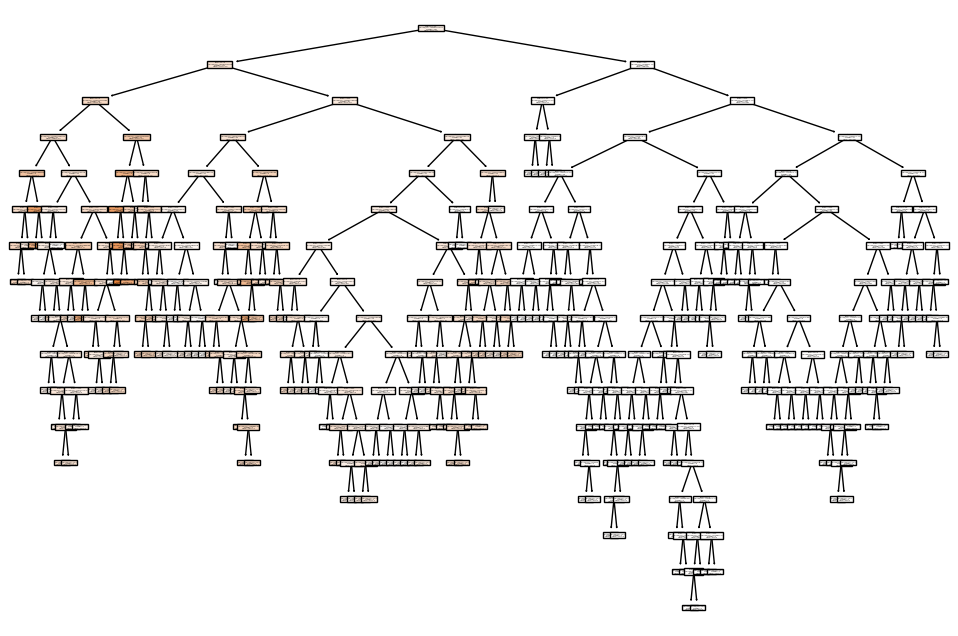

In [ ]:
# Features and target
X = data[['Month', 'Week', 'Channel']]
y = data['QTY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Optional: visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Month', 'Week', 'Channel'], filled=True)
plt.show()

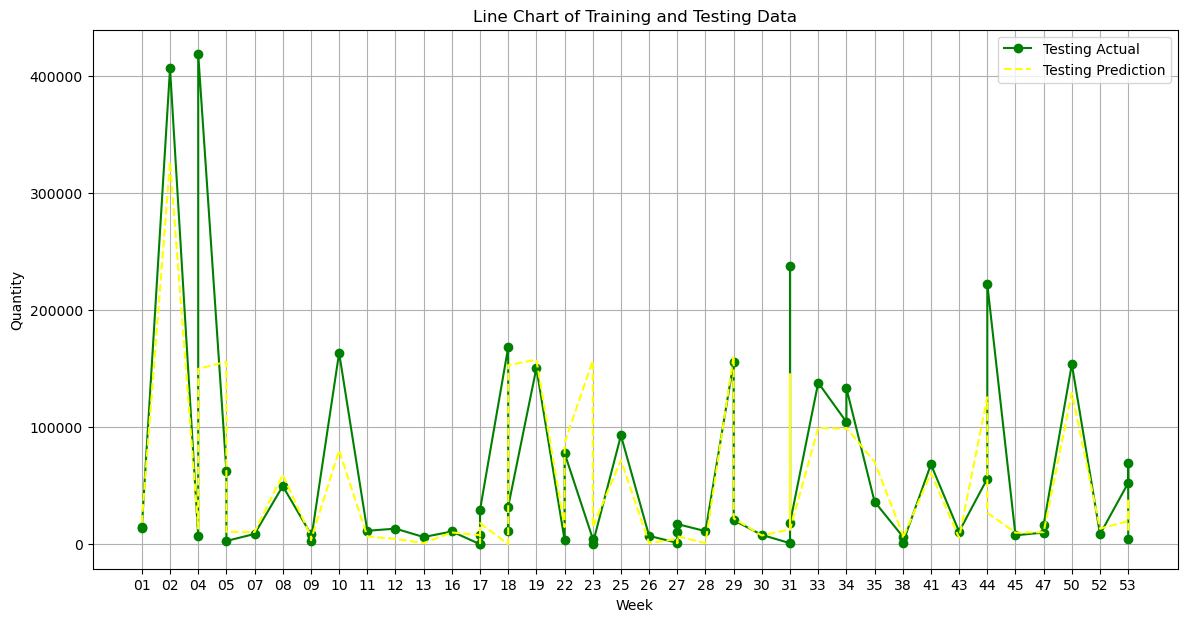

In [ ]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create DataFrames for plotting
train_results = pd.DataFrame({'Week': X_train['Week'].values, 'Qty': y_train.values, 'Prediction': y_pred_train})
test_results = pd.DataFrame({'Week': X_test['Week'].values, 'Qty': y_test.values, 'Prediction': y_pred_test})

# Sort DataFrames by Week for consistent plotting
train_results = train_results.sort_values('Week')
test_results = test_results.sort_values('Week')

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(test_results['Week'], test_results['Qty'], label='Testing Actual', color='green', linestyle='-', marker='o')
plt.plot(test_results['Week'], test_results['Prediction'], label='Testing Prediction', color='yellow', linestyle='--')

plt.xlabel('Week')
plt.ylabel('Quantity')
plt.title('Line Chart of Training and Testing Data')
plt.legend()
plt.grid(True)
plt.show()